# NOTE: This notebook is unnecessary since Google Colab now directly supports R. Please navigate to `Runtime -> Change runtime type` and select `R`.

In [ ]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [ ]:
?system

In [ ]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘miniUI’, ‘webshot’, ‘htmlwidgets’, ‘shiny’, ‘crosstalk’, ‘manipulateWidget’



In [ ]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [ ]:
install.packages('ggmap')
install.packages('codetools')

In [ ]:
library("ggmap")

In [ ]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [ ]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [ ]:
stanmodelcode <- "
data {
    int<lower=0> N;
    real y[N];
}

parameters {
    real mu;

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

In [ ]:
plot(fit)

# 0 - Starting point

## 0.0 - Installing packages

In [1]:
# Verificando sistema operacional

Sys.info()[["sysname"]]

[1] "Linux"

In [2]:
# Instalando libmagick++-dev (para não dar erro na biblioteca summarytools)

# https://github.com/ropensci/magick/issues/324
# https://stackoverflow.com/questions/11395217/run-a-bash-script-from-an-r-script

system("apt-get install libmagick++-dev")

In [3]:
# Instalando os pacotes do projeto

install.packages("tidyverse")
install.packages("janitor")
install.packages("skimr")
install.packages("gtsummary")
install.packages("kableExtra")
install.packages("gridExtra")
install.packages("rsample")
install.packages("randomForest")
install.packages("ranger")
install.packages('C50')
install.packages('xgboost')
install.packages('dials')
install.packages("glmnet")
install.packages("doParallel")
install.packages("tune")
install.packages('magick')
install.packages("summarytools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘broom.helpers’, ‘gt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package 

## 0.1 - Importing packages

In [4]:
library(tidyverse)
library(readr) # leitura de arquivos .csv
library(janitor) # nomes de colunas em caixa baixa e espaços em _
library(skimr) # gera um dataframe de estatísticas para variáveis numéricas
library(gtsummary) # gera uma figura sumarizando as variáveis
library(gridExtra) # empilhar figuras
library(summarytools)
library(rsample) # split de treino e teste
library(recipes) # receita de pré-processamento
library(randomForest)
library(parsnip) # modelos de ML
library(yardstick) # métricas de modelos de ML
library(glmnet) # algoritmo para regressão logística
library(doParallel) # Paralelização de processos
library(tune)
library(dials)
library(workflows)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


#BlackLivesMatter


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)


Attaching package: ‘summarytools’


The following object is

## 0.2 - Functions

In [5]:
# Precision and Recall @ k

precision_recall_at_k <- function(df_model_results, k=50){

  df_model_results %>%  arrange(desc(.pred_yes)) %>% # Ordenar da maior prob de yes p/ a menor

  mutate(
    TP = ifelse(response=='yes' & .pred_class=="yes", 1, 0),
    TN = ifelse(response=='no' & .pred_class=="no", 1, 0),
    FP = ifelse(response=='no' & .pred_class=="yes", 1, 0),
    FN = ifelse(response=='yes' & .pred_class=="no", 1, 0) # Definir TP, TN, FP, FN
  ) %>%

  dplyr_row_slice(1:k) %>% # Fazer o slicing das k linhas

  mutate(
    precision_at_k = TP %>% sum()/(TP %>% sum() + FP %>% sum()),
    recall_at_k = TP %>% sum()/(TP %>% sum() + FN %>% sum()) # Calcular precision e recall
  ) %>%

  select(precision_at_k, recall_at_k) %>% # Selecionar as colunas de precision e recall

  dplyr_row_slice(k) # Filtrar a última linha


}

In [47]:
# Função para calcular a correlação Cramer V =================================
cramer_v <- function(x, y) {
  contingency_table <- table(x, y)
  chi2 <- chisq.test(contingency_table)$statistic
  n <- sum(contingency_table)
  phi2 <- chi2 / n
  r <- min(length(unique(x)) - 1, length(unique(y)) - 1)
  cramer_v <- sqrt(phi2 / r)
  return(cramer_v)
}

# 1 - Data loading, checking, cleaning and description

In [79]:
# Loading data:

df <- readr::read_csv("/content/train.csv")
#View(df)
dplyr::glimpse(df)

Rows: 381109 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Gender, Vehicle_Age, Vehicle_Damage
dbl (9): id, Age, Driving_License, Region_Code, Previously_Insured, Annual_P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 381,109
Columns: 12
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Gender               <chr> "Male", "Male", "Male", "Male", "Female", "Female…
$ Age                  <dbl> 44, 76, 47, 21, 29, 24, 23, 56, 24, 32, 47, 24, 4…
$ Driving_License      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Region_Code          <dbl> 28, 3, 28, 11, 41, 33, 11, 28, 3, 6, 35, 50, 15, …
$ Previously_Insured   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0…
$ Vehicle_Age          <chr> "> 2 Years", "1-2 Year", "> 2 Years", "< 1 Year",…
$ Vehicle_Damage       <chr> "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Ye…
$ Annual_Premium       <dbl> 40454, 33536, 38294, 28619, 27496, 2630, 23367, 3…
$ Policy_Sales_Channel <dbl> 26, 26, 26, 152, 152, 160, 152, 26, 152, 152, 124…
$ Vintage              <dbl> 217, 183, 27, 203, 39, 176, 249, 72, 28, 80, 46, …
$ Response             <dbl> 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…


In [80]:
# Checking first rows
df %>% head

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0


In [81]:
# Colocando nome das colunas em caixa baixa
df <- janitor::clean_names(df)

df %>% head

id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0


In [82]:
# Data types

dplyr::tibble(features = colnames(df),
              data_tipe = unlist(lapply(df, typeof))
              )

features,data_tipe
<chr>,<chr>
id,double
gender,character
age,double
driving_license,double
region_code,double
previously_insured,double
vehicle_age,character
vehicle_damage,character
annual_premium,double


In [83]:
# Data dimensions

dplyr::tibble( dimension = unlist(list("rows", "columns")),
               count = c(dim(df)[1], dim(df)[2]))

dimension,count
<chr>,<int>
rows,381109
columns,12


In [84]:
# Checking NA's

dplyr::tibble(variable = colnames(df),
              number_of_missing = colSums(is.na(df)))

variable,number_of_missing
<chr>,<dbl>
id,0
gender,0
age,0
driving_license,0
region_code,0
previously_insured,0
vehicle_age,0
vehicle_damage,0
annual_premium,0


In [85]:
# 1 - Replacing some column names (rename() function)

# 2 - Changing categorical columns elements to lowercase

# 3 - Changing 'vehicle_age' column values

# 4 - Changin character columns to factor

# função mutate: nome da variável, operação a fazer na variável
# função across: aplica uma função à multiplas colunas

df <- df %>%

  # renomear colunas -> rename(nome_novo, nome_antigo)
  dplyr::rename(days_associated = vintage,
                health_annual_paid = annual_premium) %>%

  # mutate(nome_da_variável, operacao)
  dplyr::mutate(

                # colunas categóricas -> valores em lowercase
                across(where(is.character), tolower),

                # colunas com valores 1 ou 0 -> substituir por "yes" ou "no"

                driving_license = ifelse(driving_license==1, "yes", "no"),

                previously_insured = ifelse(previously_insured==1, "yes", "no"),

                response = ifelse(response==1, "yes", "no"),

                # coluna "vehicle_age" -> substituindo os valores
                vehicle_age = case_when(
                                        vehicle_age == "< 1 year" ~ "less_than_1_year",
                                        vehicle_age == "1-2 year" ~ "between_1_and_2_years",
                                        vehicle_age == "> 2 years" ~ "more_than_1_year"
                                        )

               ) %>%

  # convertendo variáveis de caracter p/ factor
  dplyr::mutate_if(is.character, as.factor)


In [86]:
# Adjusting "yes"/"no" variables to ordered factor:

## Ajustando as variáveis de yes/no colocando "yes" no primeiro nível do factor

df <- df %>% mutate(
                    # response variable
                    response = factor(response, levels=c("yes", "no")),

                    # driving_license
                    driving_license = factor(driving_license, levels=c("yes", "no")),

                    # previously_insured
                    previously_insured = factor(previously_insured, levels=c("yes", "no")),

                    # vehicle_damage
                    vehicle_damage = factor(vehicle_damage, levels=c("yes","no"))
                    )

In [87]:
# Contando a quantidade de "yes" e "no" na variável resposta após a conversão p/ factor ord

df$response %>% table

.
   yes     no 
 46710 334399 

In [88]:
# Saving df as rds file
base::saveRDS(df, "df_cleaned.rds")

In [ ]:
# Loading RDS file
df <- base::readRDS("df_cleaned.rds")

df %>% head

In [19]:
# Descripitive statistics

skimr::skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             298751
Number of columns          12    
_______________________          
Column type frequency:           
  factor                   6     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate ordered n_unique
1 gender                     0             1 FALSE          2
2 driving_license            0             1 FALSE          2
3 previously_insured         0             1 FALSE          2
4 vehicle_age                0             1 FALSE          3
5 vehicle_damage             0             1 FALSE          2
6 response                   0             1 FALSE          2
  top_counts                          
1 mal: 161482, fem: 137269            
2 yes: 298111, no: 640   

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [ ]:
# Pacote gtsummary -> cria sumários de tabelas

df %>%
  select(-id) %>%
  gtsummary::tbl_summary(
                          type = list(response ~ "categorical",
                                      driving_license ~ "categorical",
                                      previously_insured ~ "categorical",
                                      vehicle_damage ~ "categorical"),

                          digits = list(all_categorical() ~ c(0,2))
  )

Statistics of numerical attributes

In [21]:
# Numerical attributes -> descriptive statistical evaluation

num_attributes <- df %>%
                        select(age, days_associated, health_annual_paid)


# comando abaixo gera um descritivo estatístico
num_attributes_stats <- descr(num_attributes, style = "rmarkdown") %>%

                        round(2)

# comando abaixo formata/organiza a saída do comando acima
kableExtra::kable(data.frame(num_attributes_stats), format = "html") %>%

          kableExtra::kable_styling(bootstrap_options = "striped",
                                    full_width = FALSE)

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> age </th>
   <th style="text-align:right;"> days_associated </th>
   <th style="text-align:right;"> health_annual_paid </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Mean </td>
   <td style="text-align:right;"> 38.82 </td>
   <td style="text-align:right;"> 154.34 </td>
   <td style="text-align:right;"> 30537.40 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Std.Dev </td>
   <td style="text-align:right;"> 15.49 </td>
   <td style="text-align:right;"> 83.65 </td>
   <td style="text-align:right;"> 17247.71 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Min </td>
   <td style="text-align:right;"> 20.00 </td>
   <td style="text-align:right;"> 10.00 </td>
   <td style="text-align:right;"> 2630.00 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Q1 </td>


Categorical attributes

In [22]:
categ_attributes <- df %>%
                        select(-id, -colnames(num_attributes))

categ_attributes

gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,response
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
male,yes,28,no,more_than_1_year,yes,26,yes
male,yes,3,no,between_1_and_2_years,no,26,no
male,yes,28,no,more_than_1_year,yes,26,yes
male,yes,11,yes,less_than_1_year,no,152,no
female,yes,41,yes,less_than_1_year,no,152,no
female,yes,33,no,less_than_1_year,yes,160,no
male,yes,11,no,less_than_1_year,yes,152,no
female,yes,28,no,between_1_and_2_years,yes,26,yes
female,yes,3,yes,less_than_1_year,no,152,no


# 2 - EDA

## 2.1 Univariate

### 2.1.1 Numerical attributes

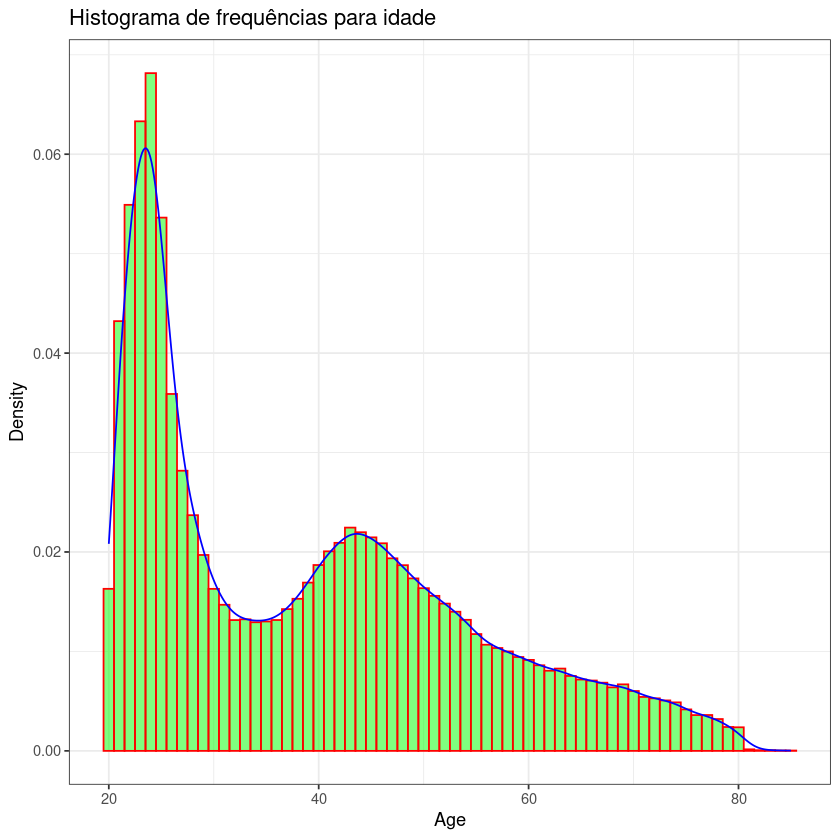

In [23]:
# Histogram

# Age ================================

age_plot <- num_attributes %>%

  ggplot(aes(x=age)) + # informar o dado que irá no eixo da figura

  geom_histogram(aes(y=after_stat(density)),
                 binwidth = 1,
                 color="red",
                 fill="green",
                 alpha=0.5) + # alpha -> controla a transparência

  geom_density(color="blue") +

  labs(x= "Age", y= "Density", title = "Histograma de frequências para idade") +

  theme_bw()

age_plot

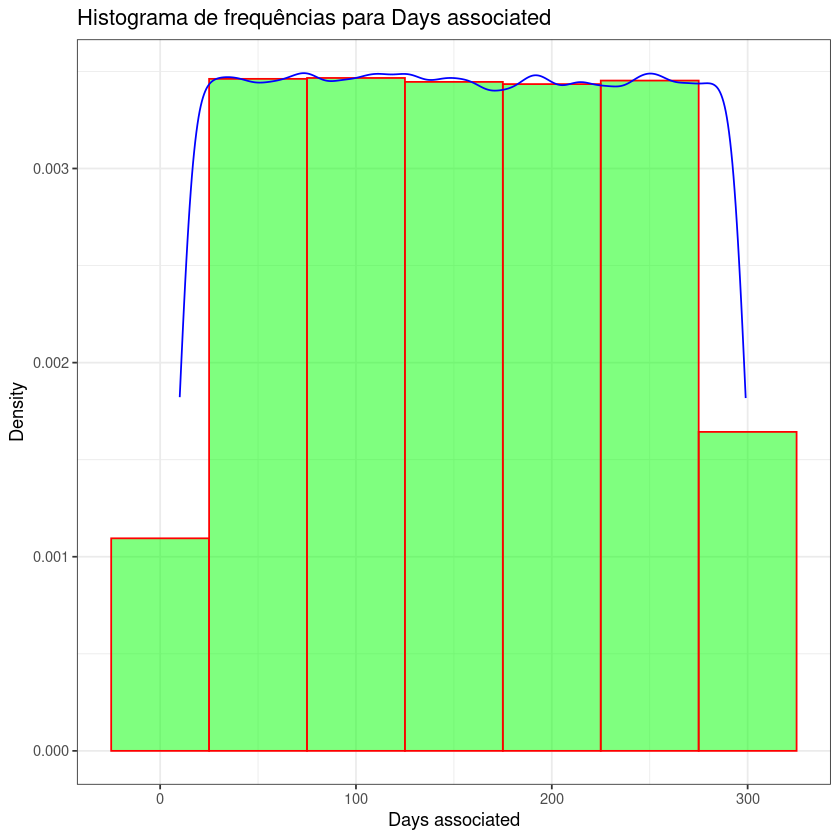

In [24]:
# Days associated ================================

days_associated_plot <- num_attributes %>%

  ggplot(aes(x=days_associated)) + # informar o dado que irá no eixo da figura

  geom_histogram(aes(y=after_stat(density)),
                 binwidth = 50,
                 color="red",
                 fill="green",
                 alpha=0.5) + # alpha -> controla a transparência

  geom_density(color="blue") +

  labs(x= "Days associated", y= "Density", title = "Histograma de frequências para Days associated") +

  theme_bw()

days_associated_plot

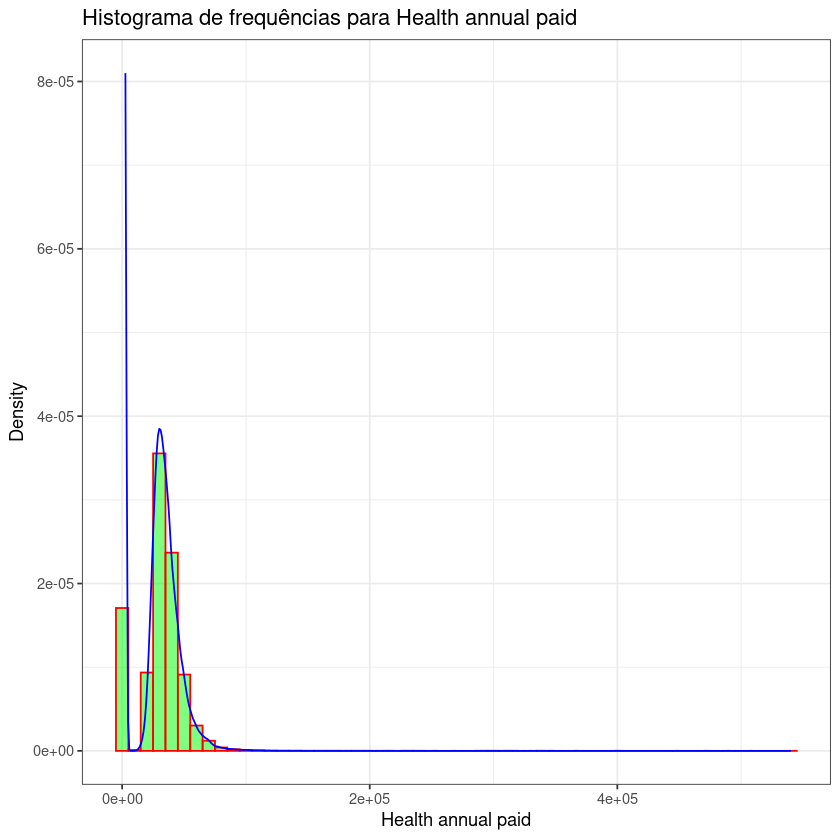

In [25]:
# Health annual paid ================================

health_annual_paid_plot <- num_attributes %>%

  ggplot(aes(x=health_annual_paid)) + # informar o dado que irá no eixo da figura

  geom_histogram(aes(y=after_stat(density)),
                 binwidth = 10000,
                 color="red",
                 fill="green",
                 alpha=0.5) + # alpha -> controla a transparência

  geom_density(color="blue") +

  labs(x= "Health annual paid", y= "Density", title = "Histograma de frequências para Health annual paid") +

  theme_bw()

health_annual_paid_plot

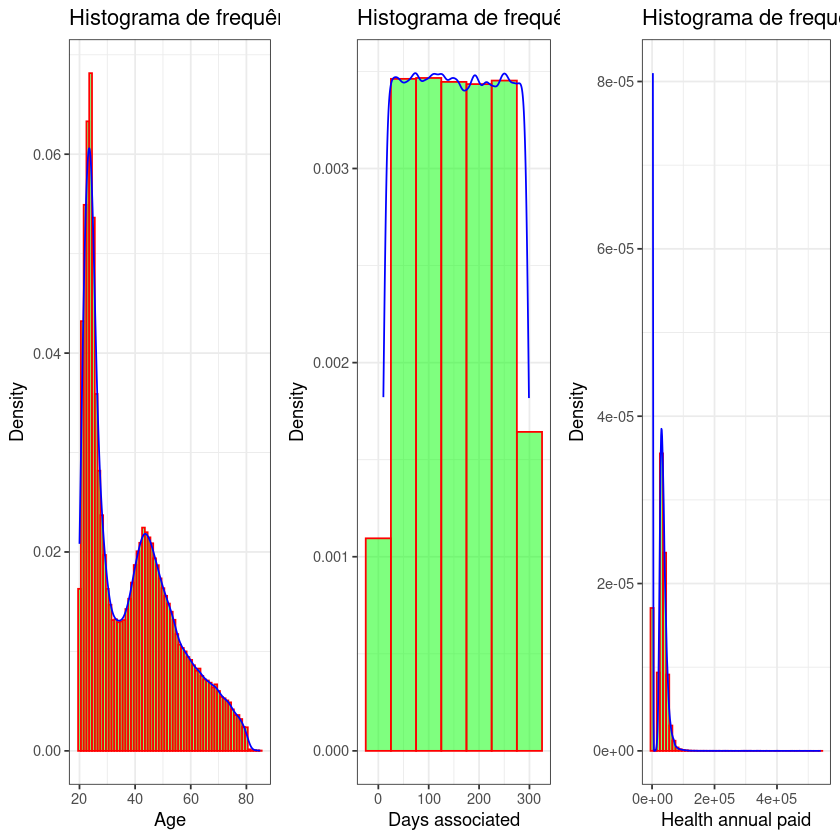

In [26]:
# Unir os 3 histogramas anteriores

gridExtra::grid.arrange(age_plot, days_associated_plot, health_annual_paid_plot,
                        ncol=3)

In [ ]:
# Removing unused objects

rm(num_attributes)
rm(num_attributes_stats)
rm(age_plot)
rm(days_associated_plot)
rm(health_annual_paid_plot)
gc()

### 2.2.2 Categorical attributes

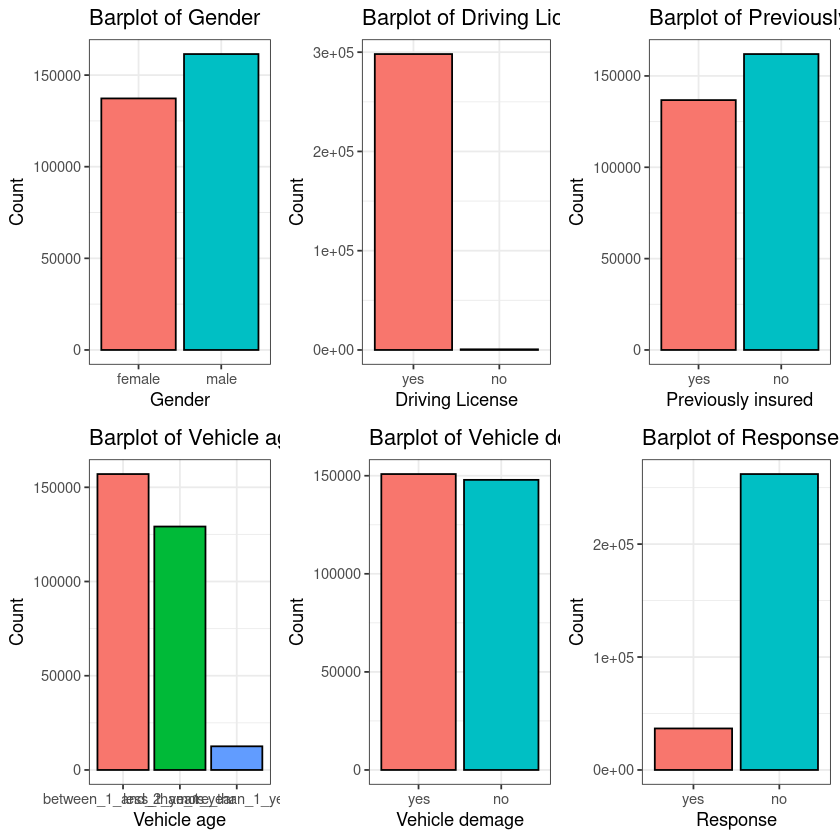

In [27]:

# Gender ============================================================
gender_plot <- categ_attributes %>%
               ggplot(aes(x=gender)) +
               geom_bar(aes(fill=gender), color="black", show.legend = FALSE) +
               labs(x="Gender", y="Count", title = "Barplot of Gender") +
               theme_bw()

# Driving license ===================================================
driving_license_plot <- categ_attributes %>%
                        ggplot(aes(x=driving_license)) +
                        geom_bar(aes(fill=driving_license), color="black", show.legend = FALSE) +
                        labs(x="Driving License", y="Count", title = "Barplot of Driving License") +
                        theme_bw()

# Previously insured ===============================================
previously_insuredr_plot <- categ_attributes %>%
  ggplot(aes(x=previously_insured)) +
  geom_bar(aes(fill=previously_insured), color="black", show.legend = FALSE) +
  labs(x="Previously insured", y="Count", title = "Barplot of Previously insured") +
  theme_bw()


# Vehicle age ======================================================
vehicle_age_plot <- categ_attributes %>%
                    ggplot(aes(x=vehicle_age)) +
                    geom_bar(aes(fill=vehicle_age), color="black", show.legend = FALSE) +
                    labs(x="Vehicle age", y="Count", title = "Barplot of Vehicle age") +
                    theme_bw()


# Vehicle demage ==================================================
vehicle_damage_plot <- categ_attributes %>%
                    ggplot(aes(x=vehicle_damage)) +
                    geom_bar(aes(fill=vehicle_damage), color="black", show.legend = FALSE) +
                    labs(x="Vehicle demage", y="Count", title = "Barplot of Vehicle demage") +
                    theme_bw()


# Response =======================================================
response_plot <- categ_attributes %>%
                 ggplot(aes(x=response)) +
                 geom_bar(aes(fill=response), color="black", show.legend = FALSE) +
                 labs(x="Response", y="Count", title = "Barplot of Response") +
                 theme_bw()




# Figura multipainéis

gridExtra::grid.arrange(gender_plot, driving_license_plot, previously_insuredr_plot,
                        vehicle_age_plot, vehicle_damage_plot, response_plot,
                        ncol=3)

In [ ]:
# Getting rid of unused objects

rm(categ_attributes)
rm(driving_license_plot)
rm(gender_plot)
rm(previously_insuredr_plot)
rm(response_plot)
rm(vehicle_age_plot)
rm(vehicle_damage_plot)
gc()

## 2.2 Bivariate

### Numéricas X Numéricas

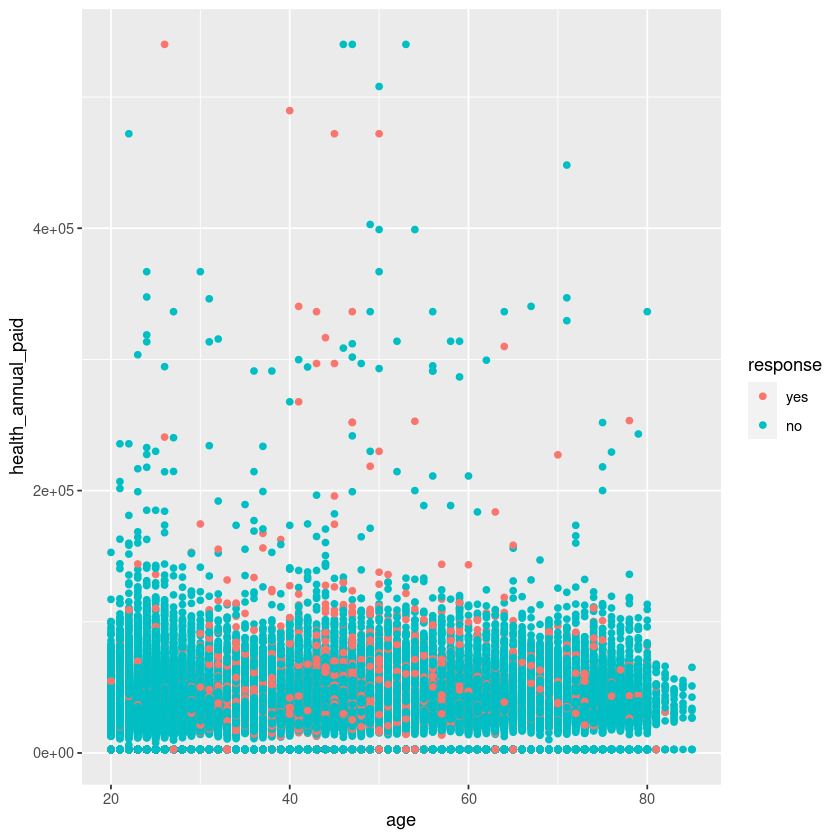

In [28]:
# Numéricas -> age X health_annual_paid

df %>%
      select(age, region_code, days_associated, health_annual_paid, response) %>%

      ggplot(aes(x=age, y=health_annual_paid),) +

      geom_point(aes(color=response))

### Numéricas X Categóricas

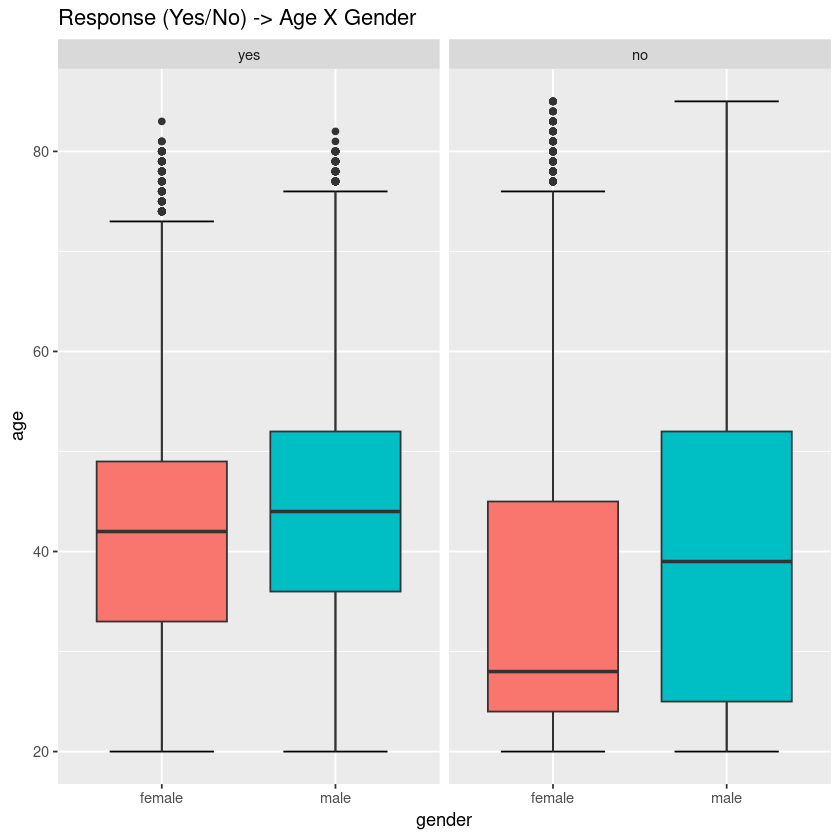

In [29]:
df %>%
      ggplot(aes(y=age, x=gender)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=gender), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="gender", title="Response (Yes/No) -> Age X Gender")

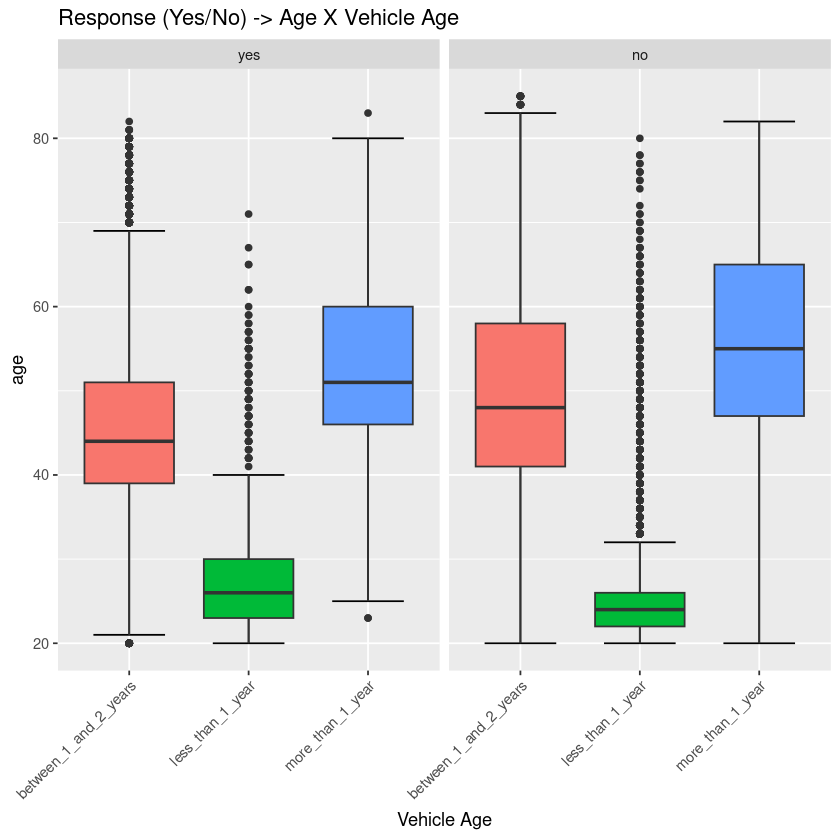

In [30]:
df %>%
      ggplot(aes(y=age, x=vehicle_age)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=vehicle_age), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="Vehicle Age", title="Response (Yes/No) -> Age X Vehicle Age") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

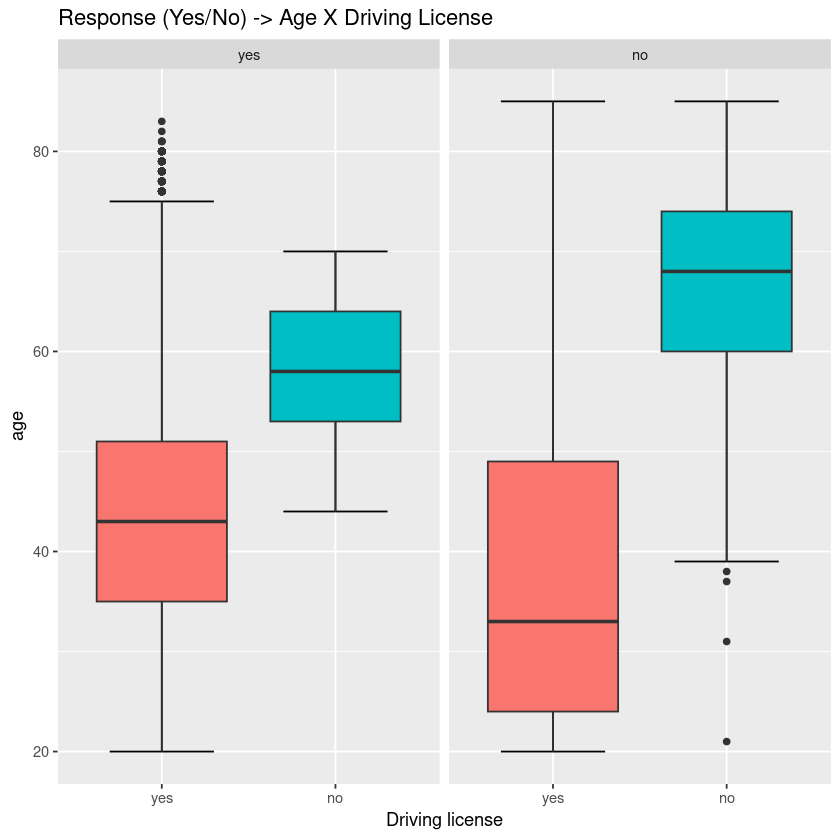

In [31]:
df %>%
      ggplot(aes(y=age, x=driving_license)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=driving_license), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="Driving license", title="Response (Yes/No) -> Age X Driving License")

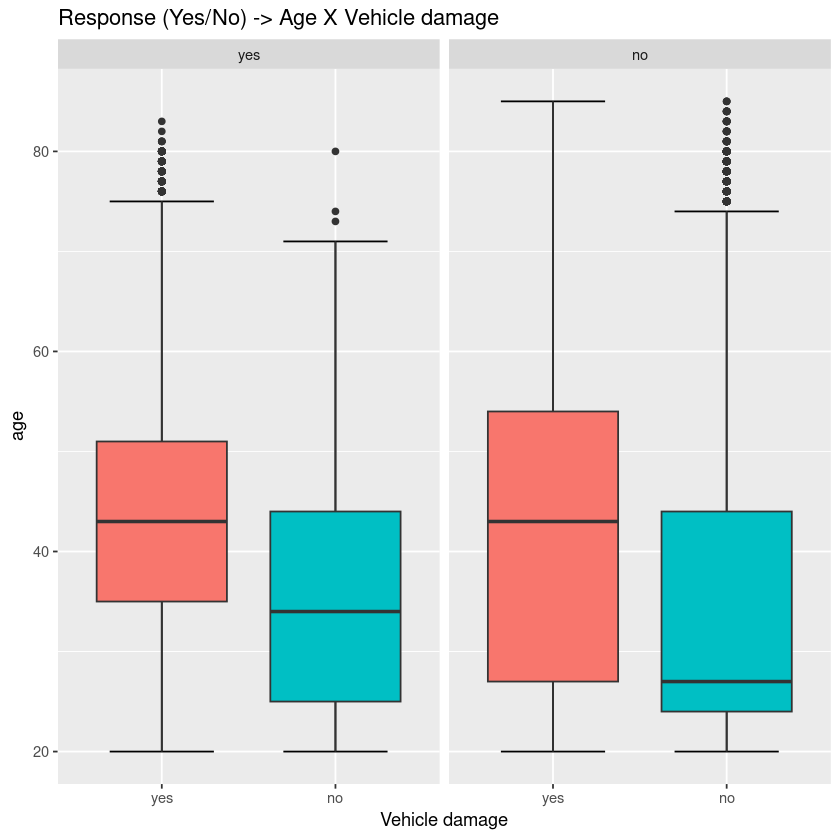

In [32]:
df %>%
      ggplot(aes(y=age, x=vehicle_damage)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=vehicle_damage), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="Vehicle damage", title="Response (Yes/No) -> Age X Vehicle damage")

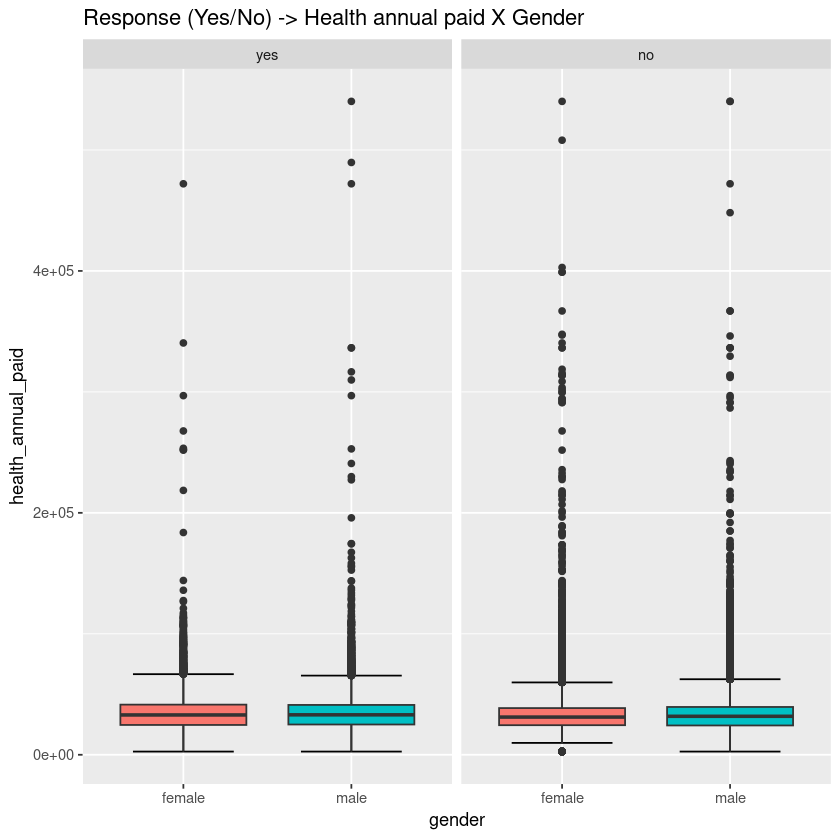

In [33]:
df %>%
      ggplot(aes(y=health_annual_paid, x=gender)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=gender), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="gender", title="Response (Yes/No) -> Health annual paid X Gender")

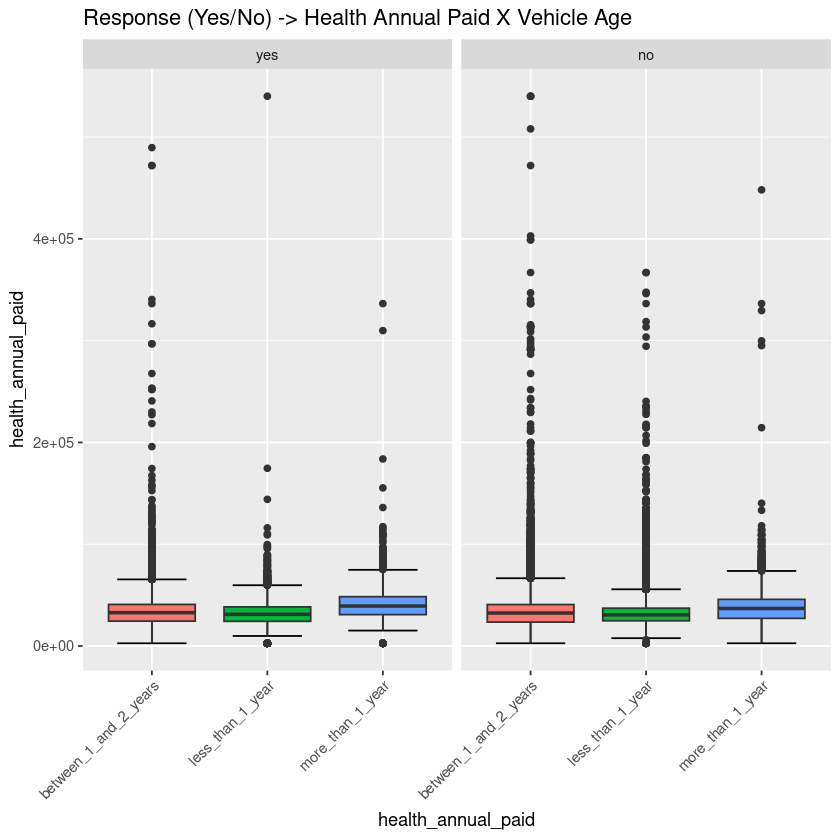

In [34]:
df %>%
      ggplot(aes(y=health_annual_paid, x=vehicle_age)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=vehicle_age), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="health_annual_paid", title="Response (Yes/No) -> Health Annual Paid X Vehicle Age") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

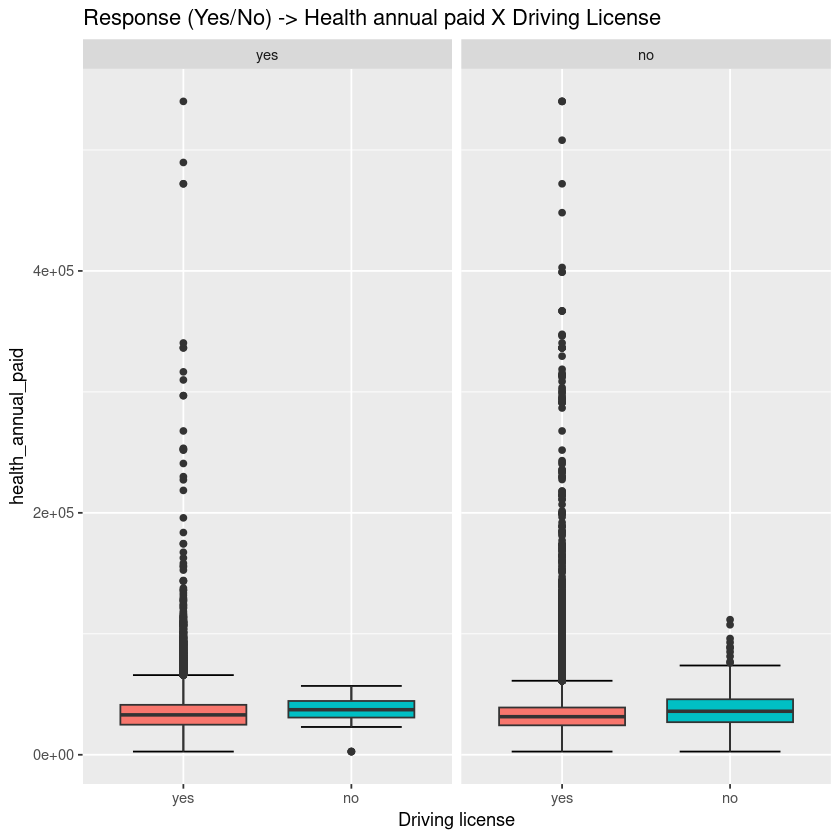

In [35]:
df %>%
      ggplot(aes(y=health_annual_paid, x=driving_license)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=driving_license), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="Driving license", title="Response (Yes/No) -> Health annual paid X Driving License")

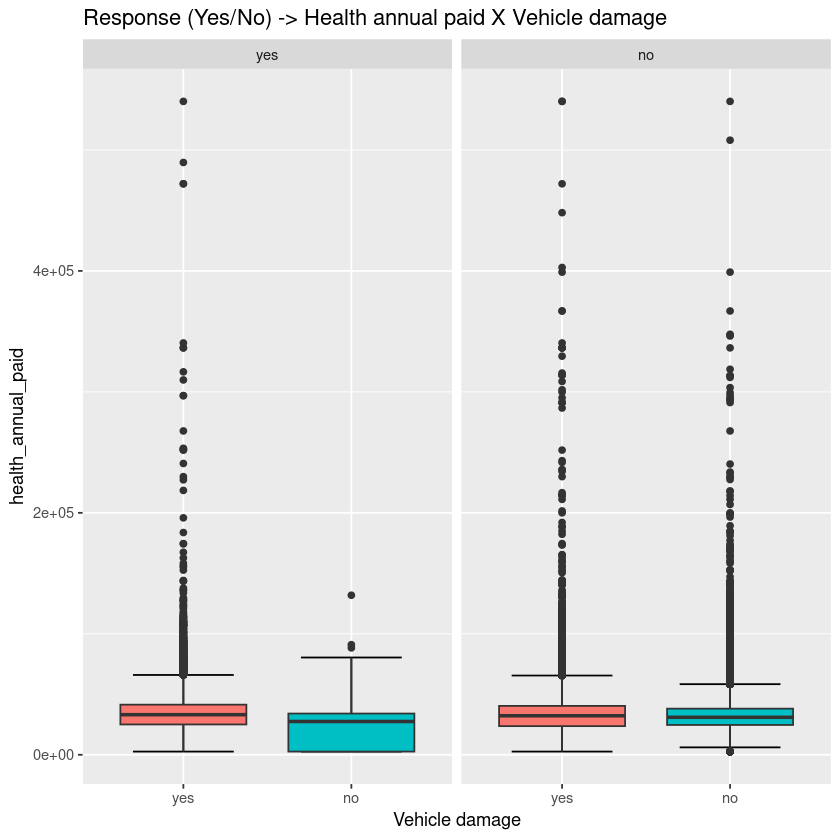

In [37]:
df %>%
      ggplot(aes(y=health_annual_paid, x=vehicle_damage)) +
      stat_boxplot(geom='errorbar', width=0.6) +
      geom_boxplot(aes(fill=vehicle_damage), show.legend = FALSE) +
      facet_wrap(vars(response)) +
      labs(x="Vehicle damage", title="Response (Yes/No) -> Health annual paid X Vehicle damage")

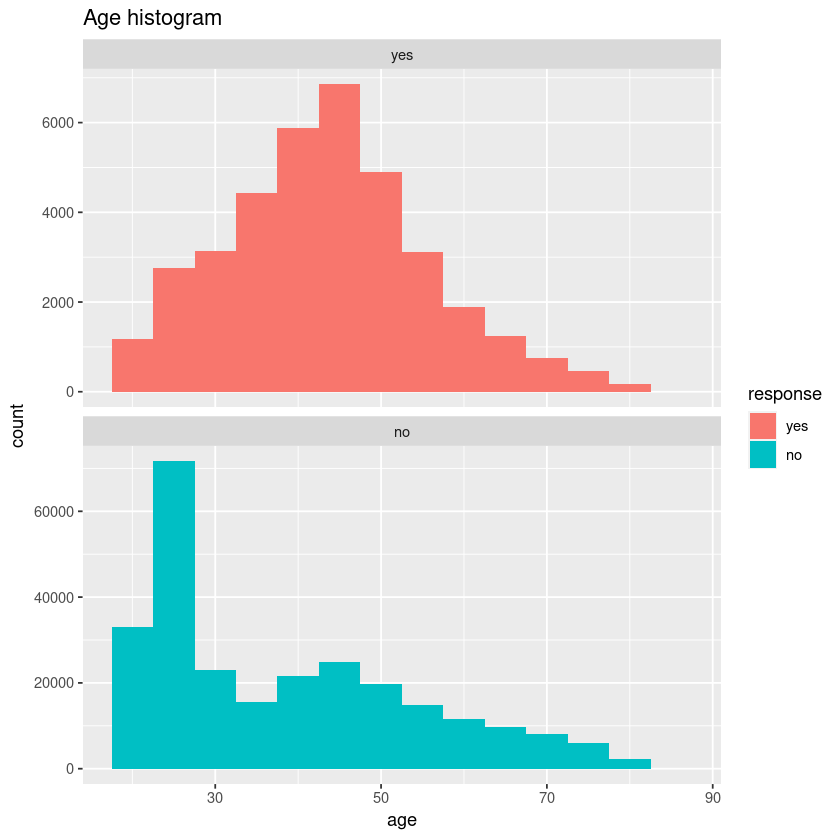

In [38]:
df %>%
  select(age, response) %>%
  ggplot(aes(x=age)) +
  geom_histogram(binwidth = 5, aes(fill=response)) +
  facet_wrap(vars(response), nrow=2, scales="free_y") +
  labs(title="Age histogram")

In [39]:
# Variável Age é diferente entre Response yes e no?

df %>%
  select(age, response) %>%
  gtsummary::tbl_summary(by=response, list(response ~ "categorical")) %>%
  add_p()

<div id="orbmsiwcbc" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#orbmsiwcbc table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#orbmsiwcbc thead, #orbmsiwcbc tbody, #orbmsiwcbc tfoot, #orbmsiwcbc tr, #orbmsiwcbc td, #orbmsiwcbc th {
  border-style: none;
}

#orbmsiwcbc p {
  margin: 0;
  padding: 0;
}

#orbmsiwcbc .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

### Categóricas X Categóricas

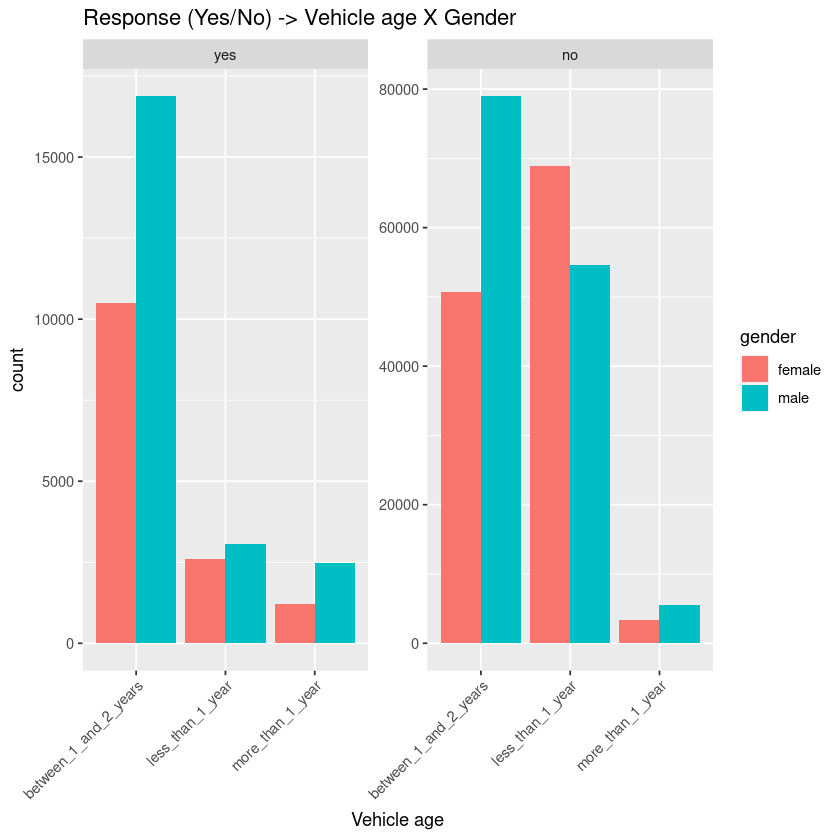

In [40]:
# Vehicle age X Gender

df %>%
  ggplot(aes(x=vehicle_age)) +
  geom_bar(aes(fill=gender), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Vehicle age", title="Response (Yes/No) -> Vehicle age X Gender") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

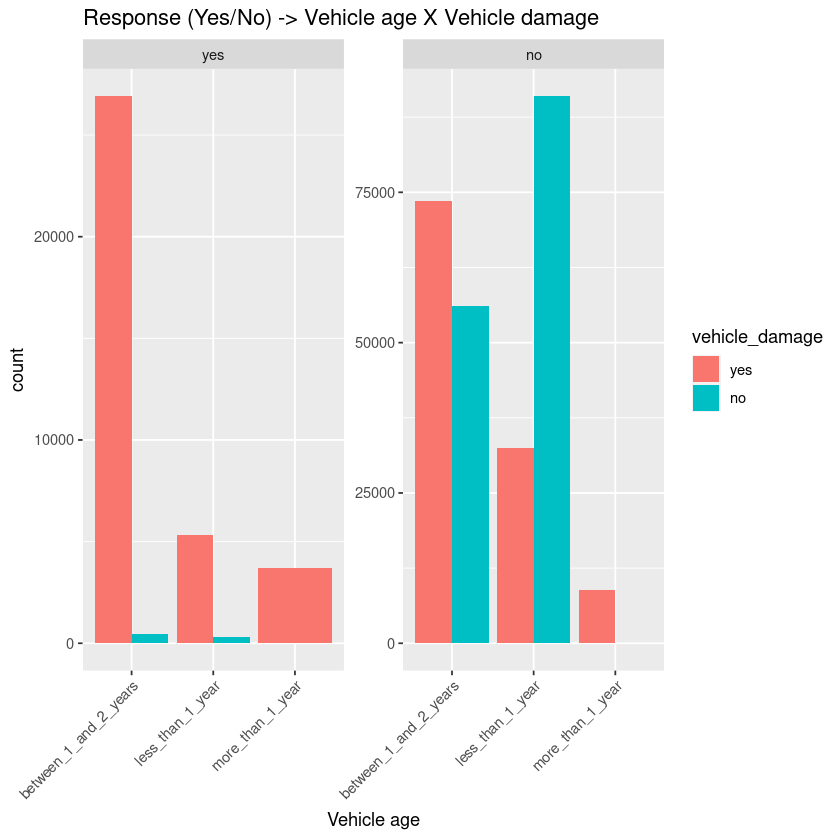

In [41]:
# Vehicle age X Vehicle damage

df %>%
  ggplot(aes(x=vehicle_age)) +
  geom_bar(aes(fill=vehicle_damage), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Vehicle age", title="Response (Yes/No) -> Vehicle age X Vehicle damage") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x

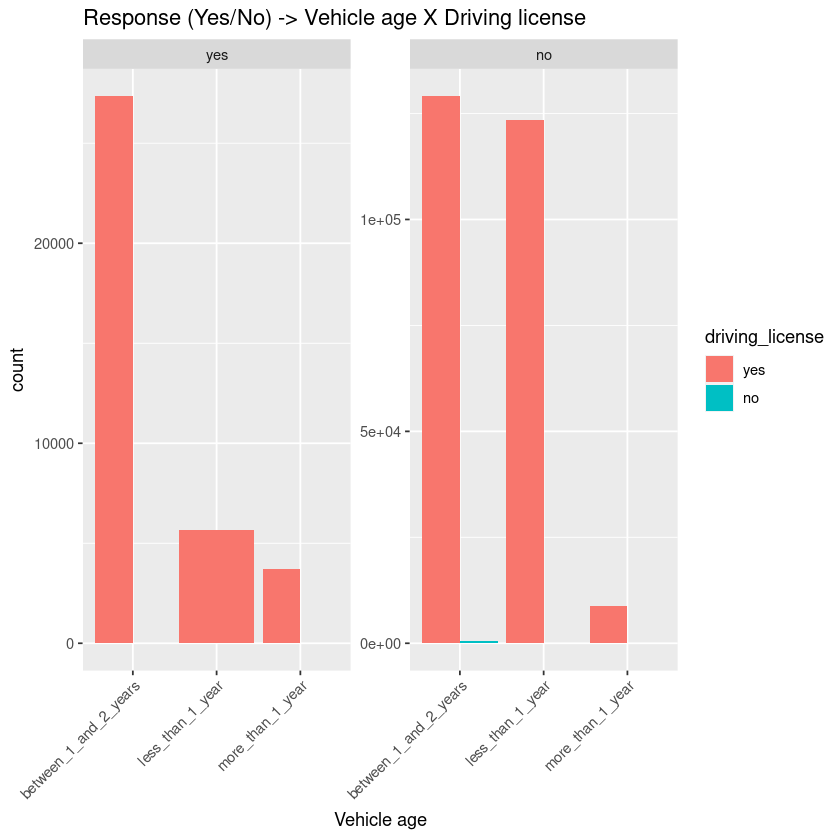

In [42]:
# Vehicle age X Driving licence

df %>%
  ggplot(aes(x=vehicle_age)) +
  geom_bar(aes(fill=driving_license), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Vehicle age", title="Response (Yes/No) -> Vehicle age X Driving license") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

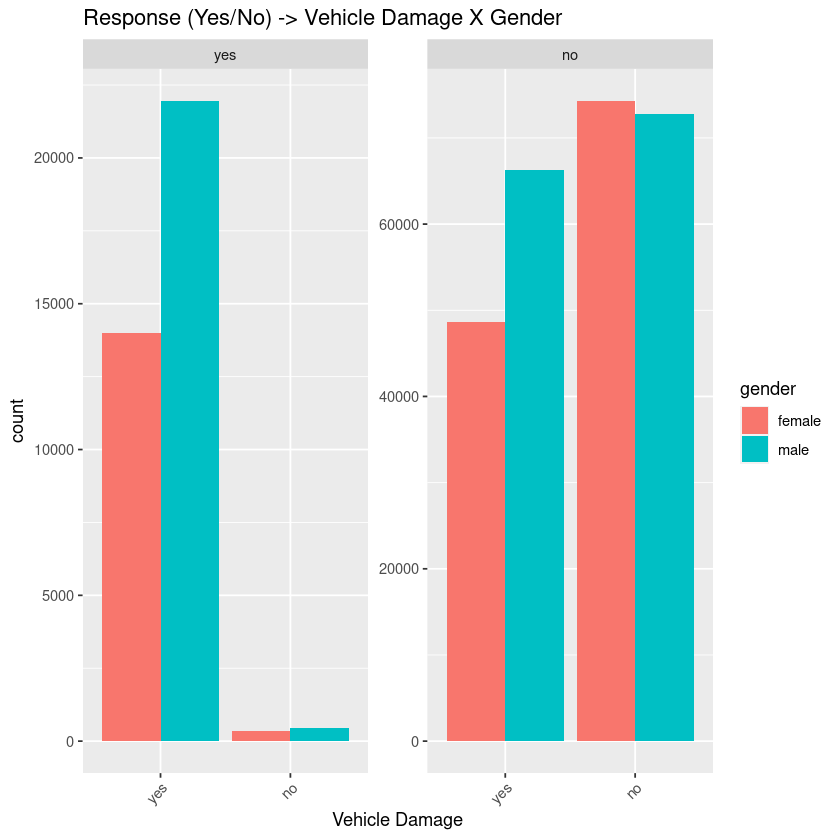

In [43]:
# Vehicle damage X Gender

df %>%
  ggplot(aes(x=vehicle_damage)) +
  geom_bar(aes(fill=gender), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Vehicle Damage", title="Response (Yes/No) -> Vehicle Damage X Gender") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

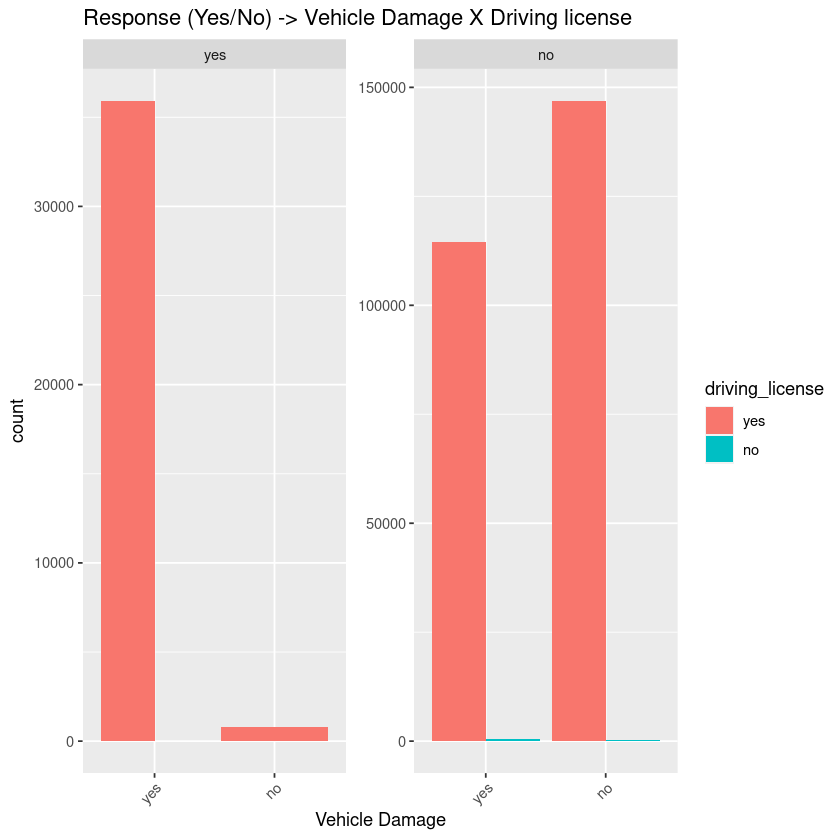

In [44]:
# Vehicle damage X Driving license

df %>%
  ggplot(aes(x=vehicle_damage)) +
  geom_bar(aes(fill=driving_license), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Vehicle Damage", title="Response (Yes/No) -> Vehicle Damage X Driving license") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

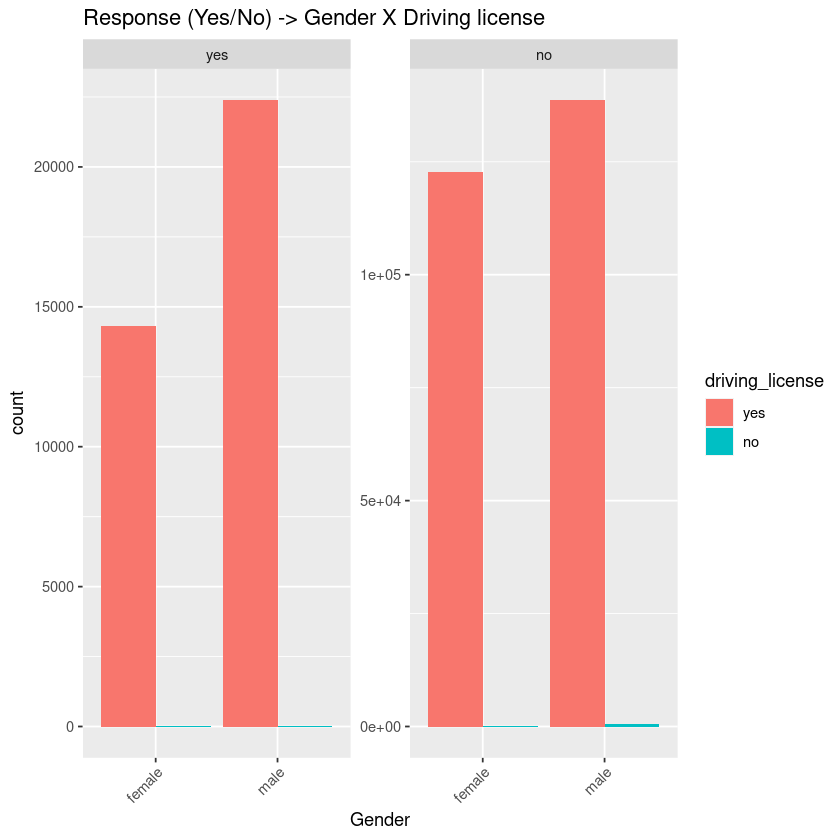

In [45]:
# Driving license X Gender

df %>%
  ggplot(aes(x=gender)) +
  geom_bar(aes(fill=driving_license), position = "dodge") +
  facet_wrap(vars(response), scales="free_y") +
  labs(x="Gender", title="Response (Yes/No) -> Gender X Driving license") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # rotacionar x ticks

## 2.3 Multivariate

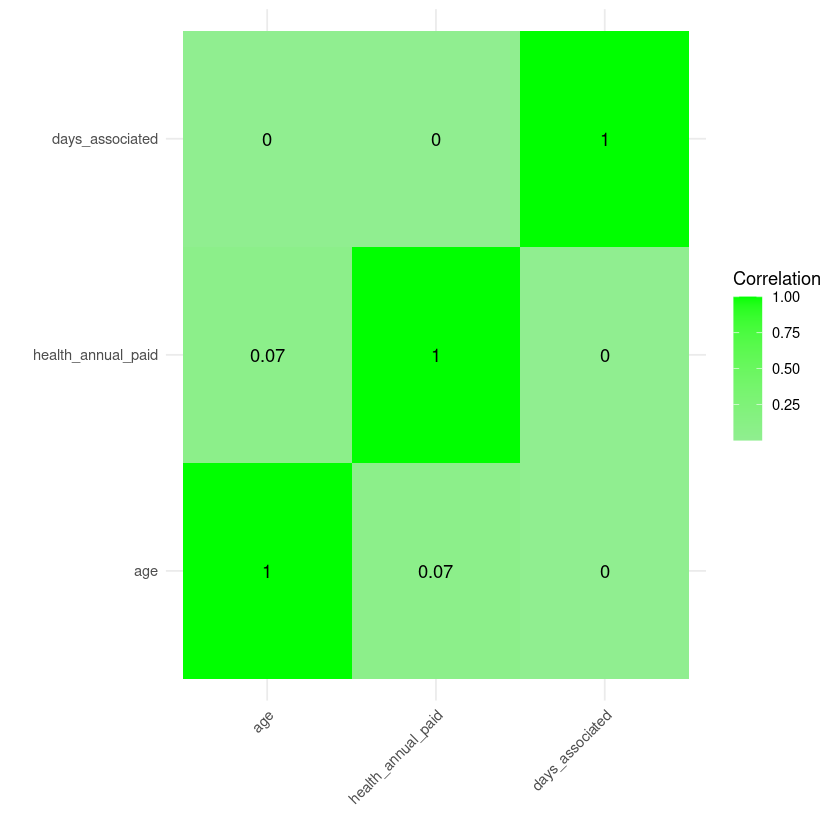

In [46]:
# Correlação entre variáveis numéricas

df %>%
  select(age, health_annual_paid, days_associated) %>%
  cor %>%
  as.table %>%
  data.frame %>%
  ggplot(aes(Var1, Var2, fill = Freq, label = round(Freq, 2))) +
  geom_tile() +
  geom_text(color = "black") + # exibit o valor numérico das correlações
  scale_fill_gradient(low = "lightgreen", high = "green") +
  theme_minimal() +
  labs(x = "", y = "") +
  theme(legend.position = "right") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = guide_colorbar(title = "Correlation"))

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”


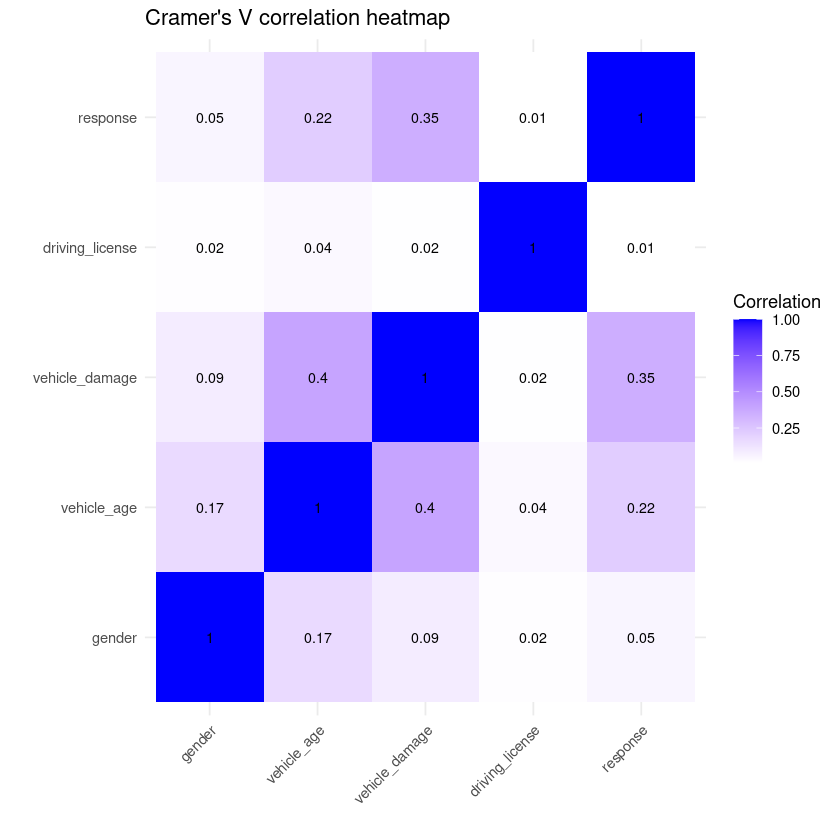

In [48]:
categorical_data <- df %>%
  select(gender, vehicle_age, vehicle_damage, driving_license, response)

# Calcular a matriz de correlação Cramer V
correlation_matrix <- outer(
  names(categorical_data),
  names(categorical_data),
  Vectorize(function(x, y) cramer_v(categorical_data[[x]], categorical_data[[y]])
  )
)

# Atribuir nomes às linhas e colunas da matriz de correlação
colnames(correlation_matrix) <- rownames(correlation_matrix) <- names(categorical_data)

# Transformar a matriz em um tibble longo
correlation_data <- as.data.frame(as.table(correlation_matrix))
names(correlation_data) <- c("Var1", "Var2", "Freq")

ggplot(data = correlation_data, aes(x = Var1, y = Var2, fill = Freq, label = round(Freq, 2))) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  theme_minimal() +
  labs(x = "", y = "") +
  labs(title = "Cramer's V correlation heatmap") +
  geom_text(size = 3, color = "black") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  guides(fill = guide_colorbar(title = "Correlation"))

In [ ]:
# Eliminando objetos adicionais

rm(categorical_data)
rm(correlation_data)
rm(correlation_matrix)
rm(cramer_v)

# 3 - Data preparation

## 3.1 Train/test split

In [49]:
# Setting seed
base::set.seed(123)

# Definindo o objeto splitter
splitter <- df %>%
                  rsample::initial_split(prop = 0.75, strata = response)

# Train split
df_train <- splitter %>%
                        rsample::training()

# Test split
df_test <- splitter %>%
                        rsample::testing()

In [51]:
## Checking response variable proportions
#
#df_train %>%
#  select(response) %>%
#  tbl_summary(type = list(response ~ "categorical"))
#
#
#df_test %>%
#  select(response) %>%
#  tbl_summary(type = list(response ~ "categorical"))
#

## 3.2 Preprocessing

In [52]:
# ========================== Transformações nos dados ==============================

# Normalização (transformar para média 1 e std 0) -> age, days_associated

# Scale (transformar para std 1) -> health_annual_paid

# ===================================================================================


# Definindo a receita

reciper <- recipes::recipe(response ~.,
                           data=df_train) %>%
                    step_normalize(age, days_associated) %>% # transformar para média 1 e std 0
                    step_scale(health_annual_paid) %>% # transformar para std 1
                    step_dummy(driving_license,
                               previously_insured,
                               vehicle_age,
                               vehicle_damage, -all_outcomes()) # transformar para one-hot



# Preparando a receita
recipe_preparer <- reciper %>%
                      prep(training = df_train)

# Cozinhando a receita (processando o dado)

df_train <- recipe_preparer %>%
                      bake(new_data = df_train)

df_test <- recipe_preparer %>%
                      bake(new_data = df_test)

In [ ]:
rm(splitter)
rm(recipe_preparer)
rm(reciper)

In [53]:
# ========================================
# Target encoding -> gender, region_code
# ========================================

# Definindo os encoders para "gender" e "region_code":

# Gender -> target encoding (proportion of "yes" in gender values)
gender_encoder <-  df_train %>%
                    mutate(response_num = ifelse(response == "yes", 1,0)) %>%
                    group_by(gender) %>%
                    summarise(gender_num = mean(response_num, na.rm= TRUE))


# Region code -> target encoding (proportion of "yes" in region_code values)
region_code_encoder <-  df_train %>%
                    mutate(response_num = ifelse(response == "yes", 1,0)) %>%
                    group_by(region_code) %>%
                    summarise(region_code_num = mean(response_num, na.rm= TRUE))

region_code_encoder

region_code,region_code_num
<dbl>,<dbl>
0,0.08875740
1,0.09966216
2,0.07062265
3,0.12704769
4,0.15217391
5,0.11558442
6,0.06753106
7,0.12583806
8,0.09682307


In [54]:
# ============================================
# Frequency encoding -> policy_sales_channel
# ============================================

# Gerando a proporção de vezes que cada nível da variável "policy_sales_channel_num" aparece

# Definindo o encoder:

policy_sales_channel_encoder <- df_train %>%
                                group_by(policy_sales_channel) %>%
                                summarise(policy_sales_channel_num = n()/dim(df_train)[1])

In [55]:
# Saving encoders

saveRDS(gender_encoder, "gender_encoder.rds")
saveRDS(region_code_encoder, "region_code_encoder.rds")
saveRDS(policy_sales_channel_encoder, "policy_sales_channel_encoder.rds")

In [56]:
# Applying encoders

# Loading encoders
gender_encoder <- readRDS("gender_encoder.rds")
region_code_encoder <- readRDS("region_code_encoder.rds")
policy_sales_channel_encoder <- readRDS("policy_sales_channel_encoder.rds")

In [57]:
# Applying loaded encoders:

# Gender

df_train <- df_train %>%
            left_join(gender_encoder) %>%
            select(-gender) %>%
            rename(gender = gender_num)

df_test <- df_test %>%
            left_join(gender_encoder) %>%
            select(-gender) %>%
            rename(gender = gender_num)


# Region code

df_train <- df_train %>%
            left_join(region_code_encoder) %>%
            select(-region_code) %>%
            rename(region_code = region_code_num)

df_test <- df_test %>%
            left_join(region_code_encoder) %>%
            select(-region_code) %>%
            rename(region_code = region_code_num)



# Policy sales channel

df_train <- df_train %>%
            left_join(policy_sales_channel_encoder) %>%
            select(-policy_sales_channel) %>%
            rename(policy_sales_channel = policy_sales_channel_num)

df_test <- df_test %>%
            left_join(policy_sales_channel_encoder) %>%
            select(-policy_sales_channel) %>%
            rename(policy_sales_channel = policy_sales_channel_num)

Joining with `by = join_by(gender)`
Joining with `by = join_by(gender)`
Joining with `by = join_by(region_code)`
Joining with `by = join_by(region_code)`
Joining with `by = join_by(policy_sales_channel)`
Joining with `by = join_by(policy_sales_channel)`


In [ ]:
## Removing objects
#
#rm(gender_encoder)
#rm(policy_sales_channel_encoder)
#rm(region_code_encoder)

In [58]:
df_train

id,age,health_annual_paid,days_associated,response,driving_license_no,previously_insured_no,vehicle_age_less_than_1_year,vehicle_age_more_than_1_year,vehicle_damage_no,gender,region_code,policy_sales_channel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2.40077820,1.9449374,0.34070064,no,0,1,0,0,1,0.1384835,0.12704769,0.2086119021
5,-0.63346686,1.5946445,-1.38106123,no,0,0,1,0,1,0.1047458,0.11978680,0.3531388634
6,-0.95625888,0.1525282,0.25700388,no,0,1,1,0,0,0.1047458,0.09875445,0.0571493604
10,-0.43979164,1.6685888,-0.89083736,no,0,0,1,0,1,0.1047458,0.06753106,0.3531388634
12,-0.95625888,2.8243233,1.60810868,no,0,0,1,0,1,0.1047458,0.05637785,0.3531388634
13,0.14123401,1.8215810,0.79505447,no,0,0,0,0,1,0.1047458,0.07213451,0.0016334764
14,2.40077820,2.1324949,-1.66802154,no,0,1,0,0,0,0.1384835,0.18858739,0.0048870402
15,2.07798618,2.7152338,-1.15388431,no,0,0,0,0,1,0.1384835,0.18858739,0.0037266471
17,-0.89170048,1.5205263,1.21353825,no,0,1,1,0,0,0.1047458,0.10992039,0.0571493604


## 3.3 Feature selection

In [59]:
# Feature selection

# Selecionando os preditores e a variável resposta

predictors <- df_train %>%
  select(-id, -response)

target <- df_train['response']

target <- df_train$response

In [60]:
# Treinando o classificador


# OBSERVAÇÕES IMPORTANTES:

# 1- A variável resposta deve ser passada como um vetor de valores
# 2- O comprimento (função lenght) de preditores e do target deve ser o mesmo


# No dataframe dos preditores serão removidas as colunas "id" e "response" pois ambas
# não são features do modelo

start_time <- Sys.time() # coletando o tempo do início da execução

rf_feature_selector <- randomForest::randomForest(df_train %>%
                                                    select(-id, -response), # preditores
                                                  df_train$response, # target
                                                  importance = TRUE,
                                                  ntree=10)


end_time <- Sys.time() # coletando o tempo do início da execução


#calculando o tempo total da execução
total_time <- end_time - start_time



print(total_time)

Time difference of 13.36104 secs


In [61]:
importance(rf_feature_selector)

,yes,no,MeanDecreaseAccuracy,MeanDecreaseGini
age,-3.48177491,5.205498,5.3326177,2808.35871
health_annual_paid,-2.25040422,6.349345,6.7612828,2596.02160
days_associated,1.96230347,-1.021632,-0.1387522,2736.21014
driving_license_no,-1.49447135,1.443650,1.1481662,19.80389
previously_insured_no,9.78191264,-9.466564,-5.2720972,2511.20532
vehicle_age_less_than_1_year,-4.67941378,5.264053,5.4843625,443.73785
vehicle_age_more_than_1_year,5.98206575,-3.080833,0.2244290,150.26173
vehicle_damage_no,8.59067548,-7.366509,-5.4853554,3749.62853
gender,0.05397663,0.873712,1.1917477,229.35608
region_code,-1.62598917,4.865195,7.5678838,1463.51370


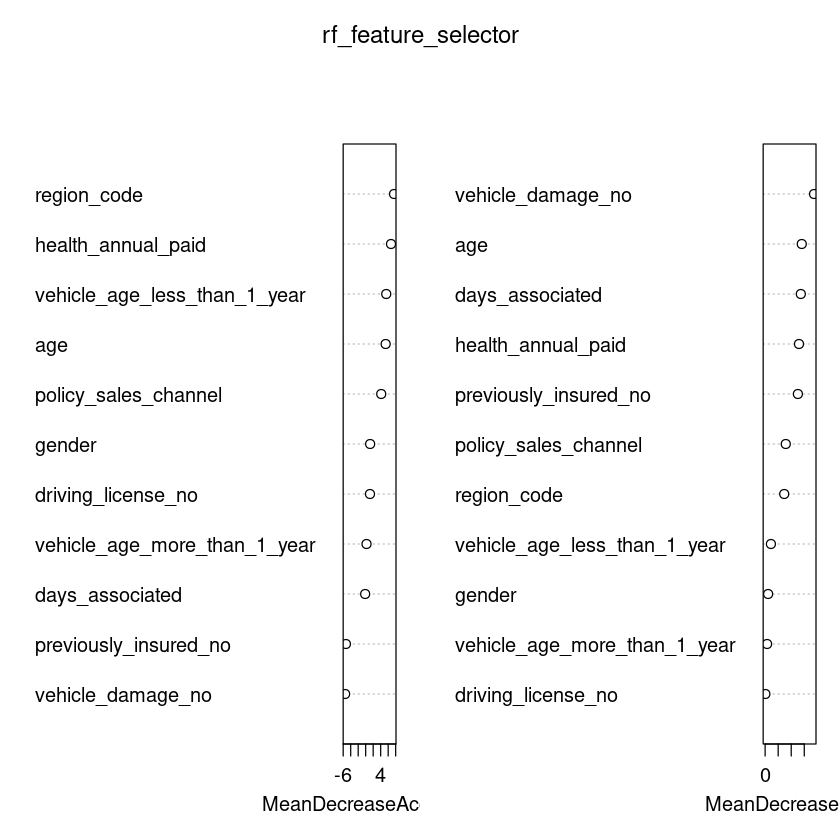

In [62]:
varImpPlot(rf_feature_selector)

In [63]:
# 7 variáveis mais significativas/importantes


important_features <-

  importance(rf_feature_selector) %>%

  as_tibble(rownames='rowname') %>% # converter o objeto como tibble

  arrange(desc(MeanDecreaseGini)) %>% #fazer o sort decrescente

  select(rowname) %>% # selecionar a coluna com o nome das variáveis

  slice(1:7) %>% # fazer o slicing das 7 features mais importantes

  pull() # converter o tibble de 1 coluna para um vetor de valores


important_features

[1] "vehicle_damage_no"     "age"                   "days_associated"      
[4] "health_annual_paid"    "previously_insured_no" "policy_sales_channel" 
[7] "region_code"

In [64]:
# Filtrar as variáveis selecionadas no df

df_train %>%
  select(all_of(important_features))

vehicle_damage_no,age,days_associated,health_annual_paid,previously_insured_no,policy_sales_channel,region_code
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.40077820,0.34070064,1.9449374,1,0.2086119021,0.12704769
1,-0.63346686,-1.38106123,1.5946445,0,0.3531388634,0.11978680
0,-0.95625888,0.25700388,0.1525282,1,0.0571493604,0.09875445
1,-0.43979164,-0.89083736,1.6685888,0,0.3531388634,0.06753106
1,-0.95625888,1.60810868,2.8243233,0,0.3531388634,0.05637785
1,0.14123401,0.79505447,1.8215810,0,0.0016334764,0.07213451
0,2.40077820,-1.66802154,2.1324949,1,0.0048870402,0.18858739
1,2.07798618,-1.15388431,2.7152338,0,0.0037266471,0.18858739
0,-0.89170048,1.21353825,1.5205263,1,0.0571493604,0.10992039


In [ ]:
# Removing variables

rm(rf_feature_selector)
rm(total_time)
rm(start_time)
rm(end_time)

# 4 - Machine learning

## 4.1 - Logistic Regression

In [65]:
# Logistic regression

# Model definition:
lr_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")


# Model training
set.seed(123)
  lr_model_fit <- lr_model %>% fit(response~ .,
                                   data = df_train %>% select(all_of(important_features), response))


# Model predictions
class_predictions <- lr_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'class')

prob_predictions <- lr_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'prob')

# Results

lr_results <- df_test %>% select(id, response) %>% bind_cols(class_predictions, prob_predictions)


# Confusion matrix

lr_confusion_matrix <- lr_results %>% yardstick::conf_mat(truth=response,
                                                          estimate = .pred_class)

In [66]:
lr_results %>% yardstick::conf_mat(truth=response,                                                        estimate = .pred_class)

          Truth
Prediction   yes    no
       yes     0     0
       no   9187 65499

## 4.2 - Decision Tree

In [67]:
# Decision Tree

# Model definition:
dt_model <- decision_tree() %>%
  set_engine("C5.0") %>%
  set_mode("classification")


# Model training
set.seed(123)
  dt_model_fit <- dt_model %>% fit(response~ .,
                                   data = df_train %>% select(all_of(important_features), response))


# Model predictions
class_predictions <- dt_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'class')

prob_predictions <- dt_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'prob')

# Results

dt_results <- df_test %>% select(id, response) %>% bind_cols(class_predictions, prob_predictions)


# Confusion matrix

dt_confusion_matrix <- dt_results %>% yardstick::conf_mat(truth=response,
                                                          estimate = .pred_class)

In [68]:
dt_results %>% yardstick::conf_mat(truth=response,
                                                          estimate = .pred_class)

          Truth
Prediction   yes    no
       yes     0     0
       no   9187 65502

## 4.3 - XGBoost

In [69]:
# XGBoost

# Model definition:
xgb_model <- boost_tree(trees = 15) %>%
  set_engine("xgboost") %>%
  set_mode("classification")


# Model training
set.seed(123)
  xgb_model_fit <- xgb_model %>% fit(response~ .,
                                   data = df_train %>% select(all_of(important_features), response))


# Model predictions
class_predictions <- xgb_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'class')

prob_predictions <- xgb_model_fit %>% predict(new_data = df_test %>% select(all_of(important_features), -response), type = 'prob')

# Results

xgb_results <- df_test %>% select(id, response) %>% bind_cols(class_predictions, prob_predictions)


# Confusion matrix

xgb_confusion_matrix <- xgb_results %>% yardstick::conf_mat(truth=response,
                                                          estimate = .pred_class)

In [70]:
xgb_results %>% yardstick::conf_mat(truth=response,
                                                          estimate = .pred_class)

          Truth
Prediction   yes    no
       yes     0     0
       no   9187 65502

In [73]:
# Armazenando os modelos em disco

saveRDS(lr_model_fit, "LogisticRegression_fitted.rds")
saveRDS(dt_model_fit, "DecisionTree_fitted.rds")
saveRDS(xgb_model_fit, "XGB_fitted.rds")

In [74]:
# Removing model objects to release memory

rm(lr_model_fit)
rm(dt_model_fit)
rm(xgb_model_fit)
rm(lr_model)
rm(dt_model)
rm(xgb_model)
rm(class_predictions)
rm(prob_predictions)

In [75]:
# Loading XGB model object

xgb_model_fit <-  base::readRDS("XGB_fitted.rds")

## Model metrics

In [76]:
# Results report
k = 5000

precision_recall_at_k(lr_results, k=k) %>%

  bind_rows(precision_recall_at_k(dt_results, k=k)) %>%

  bind_rows(precision_recall_at_k(xgb_results, k=k)) %>%

  mutate(algorithm = c("Logistic Regression", "Decision Tree", "XGBoost")) %>%

  select(algorithm, precision_at_k, recall_at_k)

algorithm,precision_at_k,recall_at_k
<chr>,<dbl>,<dbl>
Logistic Regression,NaN,0
Decision Tree,NaN,0
XGBoost,NaN,0


## Cumulative gain and lift curves

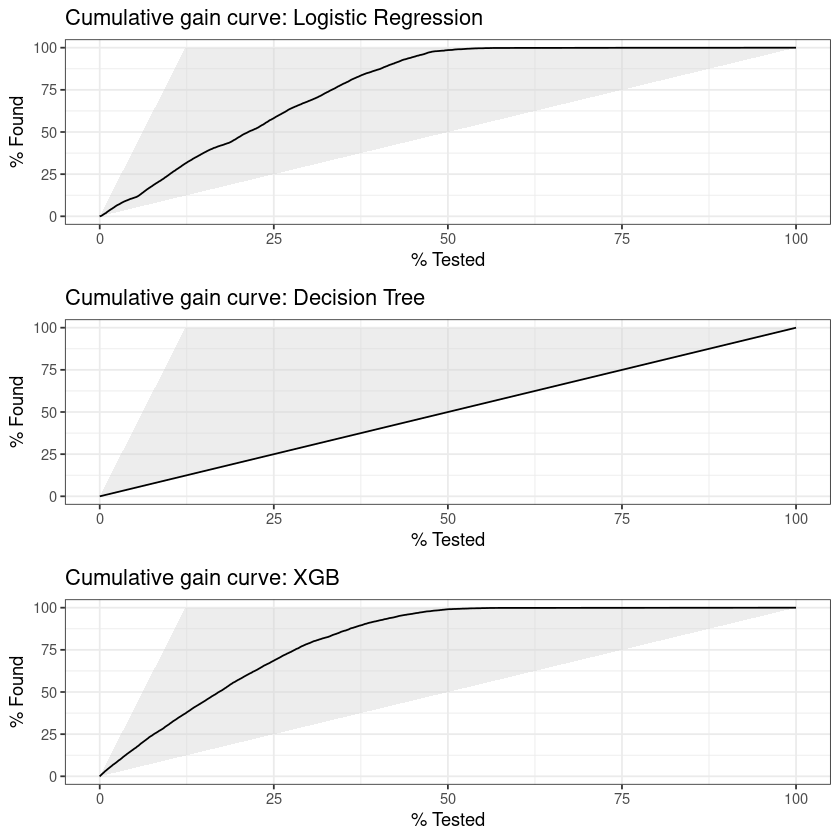

In [77]:
gridExtra::grid.arrange(

  # Gain curve

  ## Logistic regression
  lr_results %>% gain_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: Logistic Regression"),

  ## Decision tree
  dt_results %>% gain_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: Decision Tree"),


  ## XGBoost
  xgb_results %>% gain_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: XGB")

)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


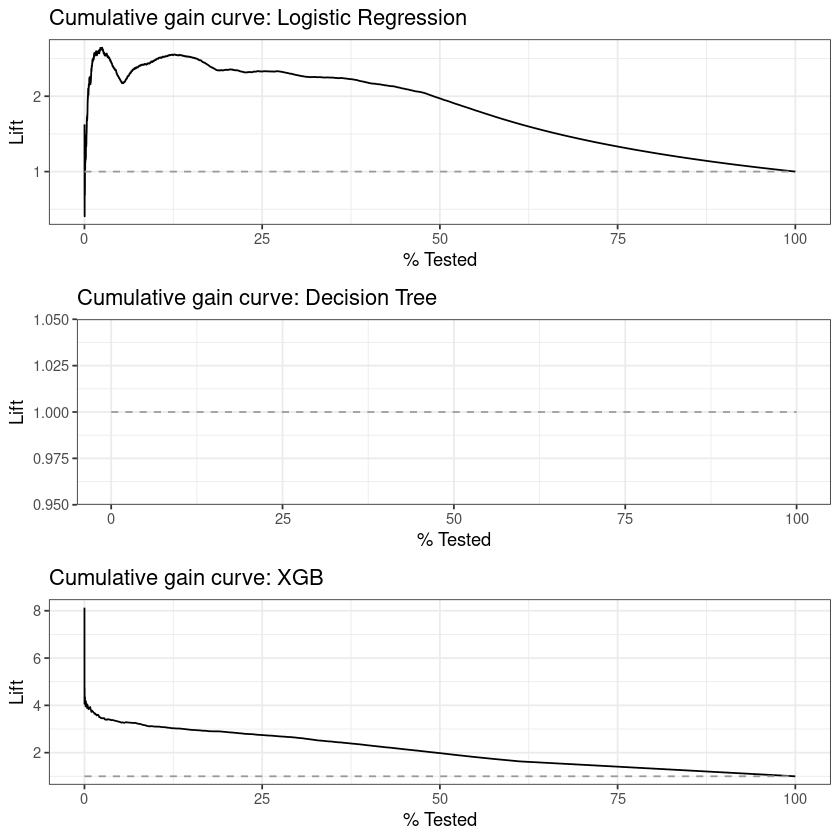

In [78]:
gridExtra::grid.arrange(

  # Lift curve

  ## Logistic regression
  lr_results %>% lift_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: Logistic Regression"),

  ## Decision tree
  dt_results %>% lift_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: Decision Tree"),


  ## XGBoost
  xgb_results %>% lift_curve(truth = response, .pred_yes) %>%
  parsnip::autoplot() +
  labs(title="Cumulative gain curve: XGB")

)

## Hiperparameter Fine Tuning Cross validation

In [114]:
# carregar novamente o df inicial após tratamento
df <- readRDS("/content/df_cleaned.rds")


# COLOCAR OS ENCODERS DE MÉDIA

# ========================== Transformações nos dados ==============================

# Normalização (transformar para média 1 e std 0) -> age, days_associated

# Scale (transformar para std 1) -> health_annual_paid

# One-hot -> driving_license, previoulsy_insured, vehicle_age, vehicle_damage

# Target encoding -> gender, region_code

# Frequency encoding -> policy_sales_channel

# ===================================================================================

# Applying encoders

# Loading encoders
gender_encoder <- readRDS("gender_encoder.rds")
region_code_encoder <- readRDS("region_code_encoder.rds")
policy_sales_channel_encoder <- readRDS("policy_sales_channel_encoder.rds")


# Applying loaded encoders:

# Gender

df_encoded <- df %>%
            left_join(gender_encoder) %>%
            select(-gender) %>%
            rename(gender = gender_num)

# Region code

df_encoded <- df_encoded %>%
            left_join(region_code_encoder) %>%
            select(-region_code) %>%
            rename(region_code = region_code_num)


# Policy sales channel

df_encoded <- df_encoded %>%
            left_join(policy_sales_channel_encoder) %>%
            select(-policy_sales_channel) %>%
            rename(policy_sales_channel = policy_sales_channel_num)



# ============== train-test Split ==============================

# Setting seed
base::set.seed(123)

# Definindo o objeto splitter
splitter <- df_encoded %>%
                  rsample::initial_split(prop = 0.75, strata = response)

# Train split
df_train <- splitter %>%
                        rsample::training()

# Test split
df_test <- splitter %>%
                        rsample::testing()




# Definindo a receita

reciper <- recipes::recipe(response ~.,
                           data=df_train) %>%
                    step_normalize(age, days_associated) %>% # transformar para média 1 e std 0
                    step_scale(health_annual_paid) %>% # transformar para std 1
                    step_dummy(driving_license,
                               previously_insured,
                               vehicle_age,
                               vehicle_damage, -all_outcomes()) # transformar para one-hot



# ==================== k-folds ======================================================

# ===================================================================================

k_folder <- df_train %>% rsample::vfold_cv(v = 10, strata = response)



# ==================== Machine learning =============================================

# ===================================================================================


# *******************************
# Logistic regression
# *******************************

## serão tunados os hiperparâmetros penalty e mixture (controlam o grau de regularização)
### função parsnip::tune() deve ser passada junto ao hiperparâmetro

# Model definition:
lr_model <- logistic_reg(
  penalty = tune(),
  mixture = tune()
  ) %>%
  set_engine("glmnet") %>%
  set_mode("classification")

#hardhat::extract_parameter_set_dials(lr_model)


# Defining grid

lr_grid <- lr_model %>% extract_parameter_set_dials() %>% grid_regular(levels = 5)

#doParallel::registerDoParallel() # paralelização de execuções

start_time <- Sys.time()


# tuning the model
lr_tune <- tune_grid(lr_model,
                     reciper,
                     resamples = k_folder,
                     grid = lr_grid)

end_time <- Sys.time()

print(end_time - start_time)
#
#
## Selecting the best model hyperparameters
#lr_best_hyperparam <- lr_tune %>% select_best("roc_auc")
#
#
## Applying the best hyperparameters to the model
#lr_best_model <- finalize_model(lr_model, lr_best_hyperparam)
#
#
#
## Creating workflow
#lr_workflow <- workflow() %>%
#  add_model(lr_best_model) %>%
#  add_recipe(reciper)
#
#
#
## Train final model
#doParallel::registerDoParallel() # paralelização de execuções
#
#
#start_time <- Sys.time()
#
#
#lr_result <- last_fit(lr_workflow, splitter) # model training
#
#
#end_time <- Sys.time()
#
#print(end_time - start_time)
#
#
#
## Confusion Matrix
#
#lr_results_conf_matrix <- lr_result %>%
#                              unnest(.predictions) %>%
#                              conf_mat(truth = response, estimate = .pred_class)
#
##print('Logistic Regression Confusion Matrix')
##print(lr_results_conf_matrix)
##
##
### Gerando report resultados Logistic Regression
##lr_model_results <- lr_result %>%
##  unnest(.predictions) %>%
##  select(.pred_yes:response)
##
##
### Calculando metrics at k
##lr_metrics_at_k <-precision_recall_at_k(lr_model_results)

Joining with `by = join_by(gender)`
Joining with `by = join_by(region_code)`
Joining with `by = join_by(policy_sales_channel)`
Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


Time difference of 16.9775 secs


In [102]:
show_notes(.Last.tune.result)

unique notes:
────────────────────────────────────────────────────────────────────────────────
Error in glmnet::glmnet(x = maybe_matrix(x), y = y, alpha = ~0.05, family = "binomial"): x has missing values; consider using makeX() to impute them
────────────────────────────────────────────────────────────────────────────────
Error in glmnet::glmnet(x = maybe_matrix(x), y = y, alpha = ~0.2875, family = "binomial"): x has missing values; consider using makeX() to impute them
────────────────────────────────────────────────────────────────────────────────
Error in glmnet::glmnet(x = maybe_matrix(x), y = y, alpha = ~0.525, family = "binomial"): x has missing values; consider using makeX() to impute them
────────────────────────────────────────────────────────────────────────────────
Error in glmnet::glmnet(x = maybe_matrix(x), y = y, alpha = ~0.7625, family = "binomial"): x has missing values; consider using makeX() to impute them
─────────────────────────────────────────────────────────────

In [ ]:
lr_tune

In [106]:
colSums(is.na(df) )

id               gender                  age 
                   0                    0                    0 
     driving_license          region_code   previously_insured 
                   0                    0                    0 
         vehicle_age       vehicle_damage   health_annual_paid 
                   0                    0                    0 
policy_sales_channel      days_associated             response 
                   0                    0                    0

In [99]:
reciper



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 11



── Operations 

• Centering and scaling for: age and days_associated

• Scaling for: health_annual_paid

• Dummy variables from: driving_license and previously_insured, ...

